In [1]:
import numpy as np     
import pandas as pd
import matplotlib                          
import matplotlib.pyplot as plt
from pykat import finesse                 
from pykat.commands import *               
from pykat.optics.maps import * 
import pandas as pd
from pykat.parallel import parakat

%config InlineBackend.figure_format='svg'
%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 1.2.1           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [6]:
HG00base = finesse.kat()         
HG00base.verbose = False

HG00base.parse( """
l laser 100 0 n0          
s s0 1 n0 nprc1       

# Power recycling mirror
m1 prm 0.03 8.5e-06 90 nprc1 nprc2
s  prc 53 nprc2 nBSb

## Central beam splitter ##
bs1 BS 0.5 3.75e-05 0 45 nBSb nBSy nBSx nBSd 

#higher order mode HG33
#tem laser 0 0 0.0 0.0
#tem laser 3 3 1.0 0.0
                                                                                                   
## X arm ##                   
s slX 7 nBSx nX1
m1 ITMX 0.014 3.75e-05 0 nX1 nX2
s sLX 3994.4692 nX2 nX3 
m1 ETMX 5e-06 3.75e-05 0 nX3 dump
cav cavityX ITMX nX2 ETMX nX3

## Y arm ##
s slY 7 nBSy nY1
m1 ITMY 0.014 3.75e-05 90 nY1 nY2
s sLY 3994.4692 nY2 nY3 
m1 ETMY 5e-06 3.75e-05 90 nY3 dump
cav cavityY ITMY nY2 ETMY nY3

# 1ppm again
attr ETMX Rc 2091.67
attr ETMY Rc 2091.67
attr ITMX Rc -2091.67
attr ITMY Rc -2091.67

# Signal recycling mirror
s  src 50.525 nBSd nsrc1
m1 srm 0.2 8.7e-06 106.62 nsrc1 nsrc2

maxtem 8

""")      

the tuning of the srm should be 106.62


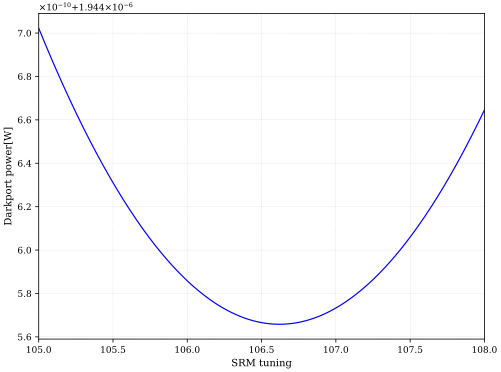

In [5]:
HGtuning = HG00base.deepcopy()
HGtuning.parse(("""xaxis srm phi lin 105 108 400
                   map ETMY randommaps/randommap0.txt
                   map ETMX randommaps/randommap1.txt
                   map ITMY randommaps/randommap2.txt
                   map ITMX randommaps/randommap3.txt
                   pd darkport nsrc2"""))
out=HGtuning.run()
tuning=105+(3/400)*np.argmin(out["darkport"])
print(f"the tuning of the srm should be {tuning}")
fig,ax =plt.subplots(1,1,figsize=(8,6),sharex=True)
ax.plot(out.x,out["darkport"])
ax.set_ylabel("Darkport power[W]")
ax.set_xlabel("SRM tuning")
plt.show()

In [39]:
HG33base = finesse.kat()         
HG33base.verbose = False

HG33base.parse( """
l laser 100 0 n0          
s s0 1 n0 nprc1       

# Power recycling mirror
m1 prm 0.03 8.5e-06 90 nprc1 nprc2
s  prc 53 nprc2 nBSb

## Central beam splitter ##
bs1 BS 0.5 3.75e-05 0 45 nBSb nBSy nBSx nBSd 

#higher order mode HG33
tem laser 0 0 0.0 0.0
tem laser 3 3 1.0 0.0
                                                                                                   
## X arm ##                   
s slX 7 nBSx nX1
m1 ITMX 0.014 3.75e-05 0 nX1 nX2
s sLX 3994.4692 nX2 nX3 
m1 ETMX 5e-06 3.75e-05 0 nX3 dump
cav cavityX ITMX nX2 ETMX nX3

## Y arm ##
s slY 7 nBSy nY1
m1 ITMY 0.014 3.75e-05 90 nY1 nY2
s sLY 3994.4692 nY2 nY3 
m1 ETMY 5e-06 3.75e-05 90 nY3 dump
cav cavityY ITMY nY2 ETMY nY3

# 1ppm again
attr ETMX Rc 2679.93
attr ETMY Rc 2679.93
attr ITMX Rc -2679.93
attr ITMY Rc -2679.93

# Signal recycling mirror
s  src 50.525 nBSd nsrc1
m1 srm 0.2 8.7e-06 -43.65 nsrc1 nsrc2

maxtem 8

""")      

the tuning of the srm should be -43.65


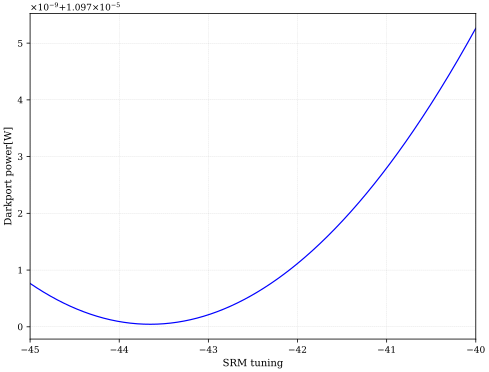

In [36]:
HGtuning = HG33base.deepcopy()
HGtuning.parse(("""xaxis srm phi lin -45 -40 400
                   map ETMY randommaps/randommap0.txt
                   map ETMX randommaps/randommap1.txt
                   map ITMY randommaps/randommap2.txt
                   map ITMX randommaps/randommap3.txt
                   pd darkport nsrc2"""))
out=HGtuning.run()
tuning=-45+(5/400)*np.argmin(out["darkport"])
print(f"the tuning of the srm should be {tuning}")
fig,ax =plt.subplots(1,1,figsize=(8,6),sharex=True)
ax.plot(out.x,out["darkport"])
ax.set_ylabel("Darkport power[W]")
ax.set_xlabel("SRM tuning")
plt.show()

In [40]:
LG22base = finesse.kat()         
LG22base.verbose = False

LG22base.parse( """
l laser 100 0 n0          
s s0 1 n0 nprc1       

# Power recycling mirror
m1 prm 0.03 8.5e-06 90 nprc1 nprc2
s prc 53 nprc2 nBSb

## Central beam splitter ##
bs1 BS 0.5 3.75e-05 0 45 nBSb nBSy nBSx nBSd 

#higher order mode LG22
tem laser 0 0 0 0
tem laser 6 0 0.234375 0
tem laser 5 1 0.15625 -90
tem laser 4 2 0.015625 0
tem laser 3 3 0.1875 -90
tem laser 2 4 0.015625 180
tem laser 1 5 0.15625 -90
tem laser 0 6 0.234375 180
                                                                                                   
## X arm ##                   
s slX 7 nBSx nX1
m1 ITMX 0.014 3.75e-05 0 nX1 nX2
s sLX 3994.4692 nX2 nX3 
m1 ETMX 5e-06 3.75e-05 0 nX3 dump
cav cavityX ITMX nX2 ETMX nX3

## Y arm ##
s slY 7 nBSy nY1
m1 ITMY 0.014 3.75e-05 90 nY1 nY2
s sLY 3994.4692 nY2 nY3 
m1 ETMY 5e-06 3.75e-05 90 nY3 dump
cav cavityY ITMY nY2 ETMY nY3

# 1ppm again
attr ETMX Rc 2789.58
attr ETMY Rc 2789.58
attr ITMX Rc -2789.58
attr ITMY Rc -2789.58

# Signal recycling mirror
s  src 50.525 nBSd nsrc1
m1 srm 0.2 8.7e-06 79.245 nsrc1 nsrc2


maxtem 8

""")      

the tuning of the srm should be 79.245


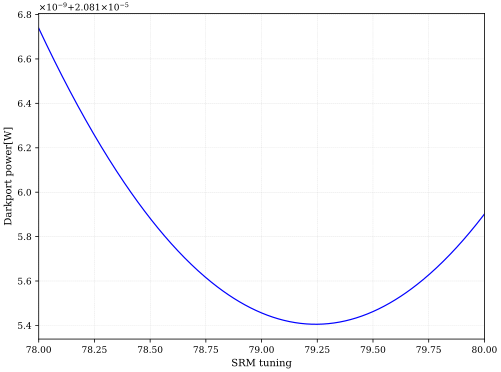

In [38]:
LGtuning = LG22base.deepcopy()
LGtuning.parse(("""xaxis srm phi lin 78 80 400
                   map ETMY randommaps/randommap0.txt
                   map ETMX randommaps/randommap1.txt
                   map ITMY randommaps/randommap2.txt
                   map ITMX randommaps/randommap3.txt
                   pd darkport nsrc2"""))
out=LGtuning.run()
tuning=78+(2/400)*np.argmin(out["darkport"])
print(f"the tuning of the srm should be {tuning}")
fig,ax =plt.subplots(1,1,figsize=(8,6),sharex=True)
ax.plot(out.x,out["darkport"])
ax.set_ylabel("Darkport power[W]")
ax.set_xlabel("SRM tuning")
plt.show()

In [7]:
pkHG00=parakat()
for i in range(30):
    HG00contrast = HG00base.deepcopy()  
    HG00contrast.parse(f"""
            map ETMY randommaps/randommap{i}.txt
            map ETMX randommaps/randommap{i+1}.txt
            map ITMY randommaps/randommap{i+2}.txt
            map ITMX randommaps/randommap{i+3}.txt
            pd darkport nsrc2 
            pd brightport nprc1
            """)
    HG00contrast.noxaxis = True
    pkHG00.run(HG00contrast)
    
outHG00 = pkHG00.getResults()
contrastHG00 = []
for i in range(30):
    contrast=outHG00[i]['darkport']/outHG00[i]['brightport']
    contrastHG00.append(contrast)
    
pd.Series(contrastHG00).to_pickle('pkl/DRHG00contrast.pkl')

/opt/anaconda3/lib/python3.7/site-packages/ipyparallel/util.py:214: RuntimeWarning: IPython could not determine IPs for [Liu]: [Errno 8] nodename nor servname provided, or not known
  RuntimeWarning)
Parallel jobs: 100%|##########################################################|

In [41]:
pkLG=parakat()
for i in range(30):
    LG22contrast = LG22base.deepcopy()  
    LG22contrast.parse(f"""
            map ETMY randommaps/randommap{i}.txt
            map ETMX randommaps/randommap{i+1}.txt
            map ITMY randommaps/randommap{i+2}.txt
            map ITMX randommaps/randommap{i+3}.txt
            pd darkport nsrc2 
            pd brightport nprc1
            """)
    LG22contrast.noxaxis = True
    pkLG.run(LG22contrast)
    
outLG = pkLG.getResults()
contrastLG = []
for i in range(30):
    contrast=outLG[i]['darkport']/outLG[i]['brightport']
    contrastLG.append(contrast)
    
pd.Series(contrastLG).to_pickle('pkl/DRLG22contrast.pkl')

Parallel jobs: 100%|##########################################################|

In [15]:
pkHG=parakat()
for i in range(30):
    HG33contrast = HG33base.deepcopy()  
    HG33contrast.parse(f"""
            map ETMY randommaps/randommap{i}.txt
            map ETMX randommaps/randommap{i+1}.txt
            map ITMY randommaps/randommap{i+2}.txt
            map ITMX randommaps/randommap{i+3}.txt
            pd darkport nsrc2 
            pd brightport nprc1
            """)
    HG33contrast.noxaxis = True
    pkHG.run(HG33contrast)
    
outHG = pkHG.getResults()
contrastHG = []
for i in range(30):
    contrast=outHG[i]['darkport']/outHG[i]['brightport']
    contrastHG.append(contrast)
    
pd.Series(contrastHG).to_pickle('pkl/DRHG33contrast.pkl')

Parallel jobs: 100%|##########################################################|

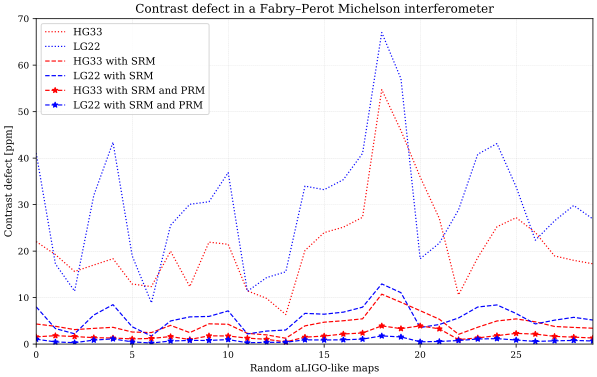

In [4]:
# plot all of them together
DRHG33contrast=pd.read_pickle('pkl/DRHG33contrast.pkl').values
DRLG22contrast=pd.read_pickle('pkl/DRLG22contrast.pkl').values
HG33contrast=pd.read_pickle('pkl/HG33contrast.pkl').values
LG22contrast=pd.read_pickle('pkl/LG22contrast.pkl').values
SRMHG33contrast=pd.read_pickle('pkl/SRMHG33contrast.pkl').values
SRMLG22contrast=pd.read_pickle('pkl/SRMLG22contrast.pkl').values

fig,ax =plt.subplots(figsize=(10,6))
ax.plot(HG33contrast*1e6,'r:',label='HG33')
ax.plot(LG22contrast*1e6,'b:',label='LG22')
ax.plot(SRMHG33contrast*1e6,'r--',label='HG33 with SRM')
ax.plot(SRMLG22contrast*1e6,'b--',label='LG22 with SRM')
ax.plot(DRHG33contrast*1e6,'r--*',label='HG33 with SRM and PRM')
ax.plot(DRLG22contrast*1e6,'b--*',label='LG22 with SRM and PRM')

ax.set_title('Contrast defect in a Fabry–Perot Michelson interferometer')
ax.set_xlabel("Random aLIGO-like maps")
ax.set_ylabel("Contrast defect [ppm]")
ax.set_ylim(0,70)
ax.legend(loc="upper left")
plt.show()

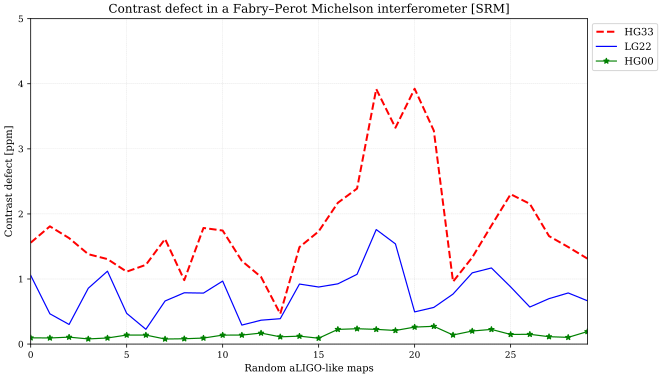

In [8]:
HG33contrast=pd.read_pickle('pkl/DRHG33contrast.pkl').values
LG22contrast=pd.read_pickle('pkl/DRLG22contrast.pkl').values
HG00contrast=pd.read_pickle('pkl/DRHG00contrast.pkl').values

fig,ax =plt.subplots(figsize=(10,6))
ax.plot(HG33contrast*1e6,'r--',label='HG33',linewidth=2)
ax.plot(LG22contrast*1e6,'b',label='LG22')
ax.plot(HG00contrast*1e6,'g-*',label='HG00')
ax.set_title('Contrast defect in a Fabry–Perot Michelson interferometer [SRM]')
ax.set_xlabel("Random aLIGO-like maps")
ax.set_ylabel("Contrast defect [ppm]")
ax.set_ylim(0,5)
ax.legend(loc=2,bbox_to_anchor=(1,1))
plt.show()